<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Homework-Lotka_Volterra-Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Lotka-Volterra equations

The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species.  Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators).  You could think of $x$ and $y$ as being the population in thousands, say, so that $x=2$ means there are 2000 rabbits.  Strictly the only allowed values of $x$ and $y$ would then be multiples of 0.001, since you can only have whole numbers of rabbits or
foxes.  But 0.001 is a pretty close spacing of values, so it's a decent
approximation to treat $x$ and $y$ as continuous real numbers so long as
neither gets very close to zero.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional
to their population, but are eaten by the foxes at a rate proportional to
both their own population and the population of foxes:

$
\frac{dx}{dt} = \alpha x - \beta xy$

where $\alpha$ and $\beta$ are constants.  At the same time the foxes
reproduce at a rate proportional to the rate at which they eat
rabbits-because they need food to grow and reproduce-but also die of
old age at a rate proportional to their own population:

$
\frac{dy}{dt} = \gamma xy - \delta y
$

where $\gamma$ and $\delta$ are also constants.

##A. 

Write a program to solve these equations using the fourth-order
  Runge-Kutta method for the case $\alpha=1$, $\beta=\gamma=0.5$, and
  $\delta=2$, starting from the initial condition $x=y=2$.  Have the
  program make a graph showing both $x$ and $y$ as a function of time on
  the same axes from $t=0$ to $t=30$.  (Hint: Notice that the differential
  equations in this case do not depend explicitly on time $t$ in vector
  notation, the right-hand side of each equation is a function $f(\vec{r})$
  with no $t$ dependence.  You may nonetheless find it convenient to define
  a Python function ```f(r,t)``` including the time variable, so that your
  program takes the same form as other programs we've written.
  You don't have to do it that way, but it can avoid some confusion.)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Set your user defined variables for the initial conditions as well as the start and end time and the timestep. Also set the user constant alpha through delta for the LV equations.

In [ ]:
start =  0.0
end   = 30.0
r_0   =  np.array([2.0, 2.0])
t_0   =  0.0
h     =  0.01
alpha = 1.0
beta = 0.5
gamma = 0.5
delta = 2.0

Define our function f(r,t)

In [ ]:
def f(r,t):
  x = r[0]
  y = r[1]
  fx = alpha * x - beta * x * y
  fy = gamma * x * y - delta * y
  return np.array([fx,fy])

This is the main part of the code. Note that rpoints is an Nx2 array to keep track of both x and y as a function of time.

The code then plots the populations as a function of time.

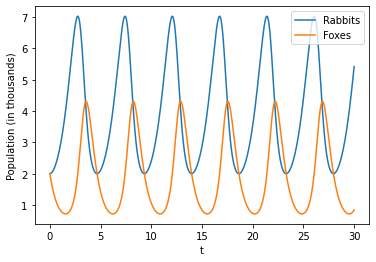

In [ ]:
N = int((end-start)/h) +1 #determine how many points I need. I'm adding 1 to make sure I get both the start and end times
rpoints = np.zeros((N,2)) #define an array for my x values.  Initially set everything to 0.
tpoints = np.zeros(N) #define an array for my time values.  Initially set everything to 0.
rpoints[0] = r_0 #set our initial condition 
tpoints[0] = t_0 #set our initial condition 
for n in range(N-1):
  tpoints[n+1] = h * (n+1)
  r = rpoints[n]
  t = tpoints[n]
  k_1 = h*f(r,t)
  k_2 = h*f(r+ 0.5 *k_1,t+0.5*h)
  k_3 = h*f(r+ 0.5 *k_2,t+0.5*h)
  k_4 = h*f(r+ k_3, t+h)
  rpoints[n+1] = r + (k_1+2*k_2+2*k_3+k_4)/6
plt.plot(tpoints,rpoints[:,0],label='Rabbits')
plt.plot(tpoints,rpoints[:,1],label='Foxes')
plt.xlabel('t')
plt.ylabel('Population (in thousands)')
plt.legend()
plt.show()

##B.

Describe in words what is going on in the system, in terms of rabbits
  and foxes.

At first there aren't enough foxes so the rabbit population increases while the foxes die off.  But then there are so many rabbits that the foxes eat well and increase their population, which reduces the rabbit population.  Eventually there are so many foxes though that they eat the rabbits, they can't find food, and then they don't replicate enough and their population dies down.  This cycle repeats.

#Grading (50 points)

* 10 points (part a): Did you write easy to read code that is well documented, including variable names that make sense?

* 20 points (part a): Did you write or modify code that correctly calculates the LV equations? Your code should work in two dimensions and produce the correct results.
* 10 points (part a): Did you properly make a plot of the rabbit and fox populations as a function of time? Are your axis appropriatly labeled in the plot, and is there a legend or some other way to tell the curves apart?
* 10 points (part b): Did you write a description of the system that includes the populations of the rabbits and foxes being coupled to one another and cyclic? Does the explanation make sense?